<a href="https://colab.research.google.com/github/Sergius-DS/S_Tiempo_Tendencias/blob/main/Time_Series_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import normal, seed
from numpy.random import choice
from scipy.stats import norm

# CHAPTER 3

In [ ]:
data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
data.head(2)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
data.rolling(window=30).mean()

,Close
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,NaN
...,...
2016-12-26,NaN
2016-12-27,NaN
2016-12-28,NaN


data.rolling(window=30).mean() is creating a subgroup of 30 days and applying the mean to the values within that group.

In [ ]:
data.rolling(window='30D').mean()

,Close
Date,
2014-01-02,556.000000
2014-01-03,553.975000
2014-01-04,553.975000
2014-01-05,553.975000
2014-01-06,555.350000
...,...
2016-12-26,779.575500
2016-12-27,780.145714
2016-12-28,780.946190


data.rolling(window='30D').mean() is creating a subgroup of 30 CALENDAR days and applying the mean to the values within that group

In [ ]:
r90 = data.rolling(window='90D').mean()

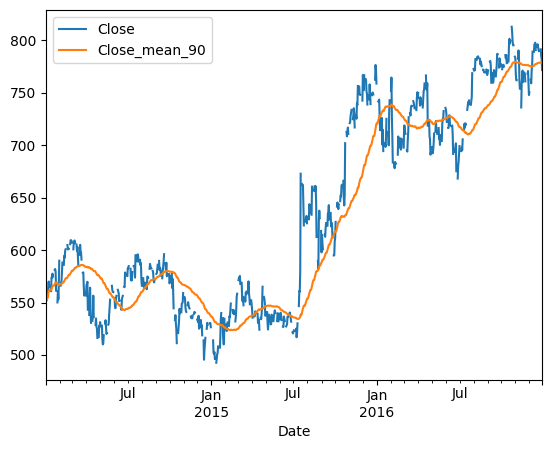

In [ ]:
data.join(r90.add_suffix('_mean_90')).plot();plt.show()

In [ ]:
data.join(r90.add_suffix('_mean_90')).head(2)

,Close,Close_mean_90
Date,,
2014-01-02,556.00,556.000
2014-01-03,551.95,553.975


data.join(r90.add_suffix('_mean_90'))

It adds the pd Series r90 as a column to the DataFrame called "data" with the suffix "_mean90" appended to the column name of r90 (Close): result "Close_mean_90"

In [ ]:
data['mean90'] = r90
r360 = data['Close'].rolling(window='360D').mean()
data['mean360'] = r360

In [ ]:
#There were missing values in 'Close" column, missing values were filled
data['Close'] = data['Close'].resample('D').interpolate()

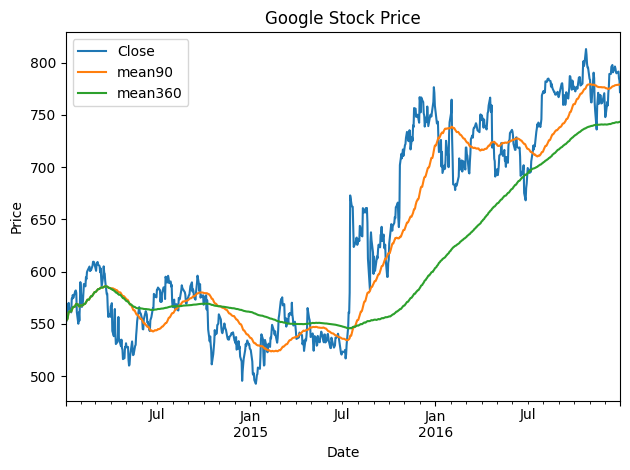

In [ ]:
fig, ax = plt.subplots()

# Plot data
data.plot(ax=ax)

# Set title
ax.set_title('Google Stock Price')

# Set axes' labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

To identify Trend Analysis, Moving Average Crossovers and Volatility Assessment

In [ ]:
r = data.Close.rolling(window='90D').agg(['mean', 'std'])
r.head(2)

,mean,std
Date,,
2014-01-02,556.000,NaN
2014-01-03,553.975,2.863782


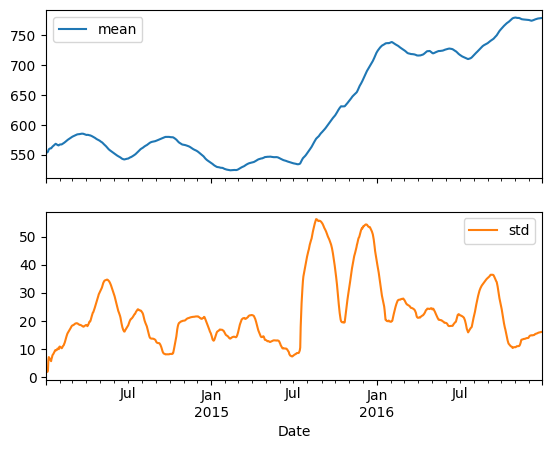

In [ ]:
r.plot(subplots=True);plt.show()

r = data.Close.rolling(window='90D').agg(['mean', 'std'])

It calculates the mean and standard deviation for subgroups of 90 calendar days from the 'Close' column, creating two new columns in the output DataFrame saved in the variable "r"

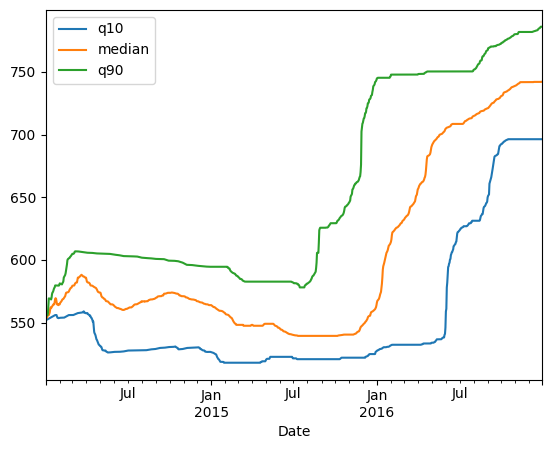

In [ ]:
rolling = data.Close.rolling(window='360D')
q10 = rolling.quantile(0.1).to_frame('q10')
median = rolling.median().to_frame('median')
q90 = rolling.quantile(0.9).to_frame('q90')
pd.concat([q10, median, q90], axis=1).plot();plt.show()

To visually inspect patterns and trends, making informed decisions based on historical data.

Financial analysts use such rolling quantiles to understand the risk profile of an investment over time. By observing how the 10th and 90th percentiles fluctuate, they can gauge the volatility and potential extreme movements in the market or a specific asset.

In [ ]:
pd.Series(rolling).info()

<class 'pandas.core.series.Series'>
RangeIndex: 1094 entries, 0 to 1093
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1094 non-null   object
dtypes: object(1)
memory usage: 8.7+ KB


## Experience 5

In [ ]:
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
data.head(2)

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43


In [ ]:
#Calculating the cumulative rate of return for the S&P 500 index
pr = data.SP500.pct_change()#period return
# This line adds 1 to each daily return.
# This is done to facilitate the cumulative product calculation in the next step
pr_plus_one = pr.add(1)
#This line calculates the cumulative return over the entire period
cumulative_return = pr_plus_one.cumprod().sub(1)

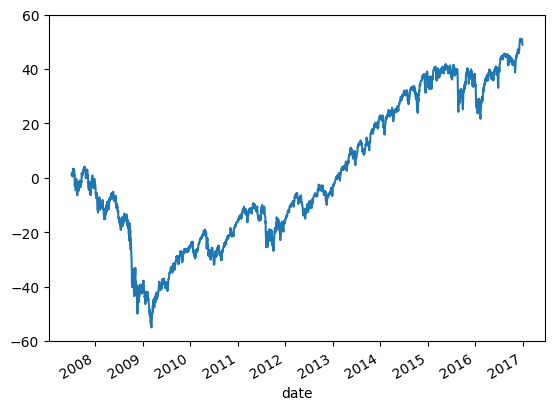

In [ ]:
cumulative_return.mul(100).plot();plt.ylim([-60, 60]);plt.show()

In [ ]:
#Runniing MIN and MAX

In [ ]:
data['running_min'] = data.SP500.expanding().min()
data['running_max'] = data.SP500.expanding().max()

These lines of code are used to track the lowest and highest values of the S&P 500 index over time

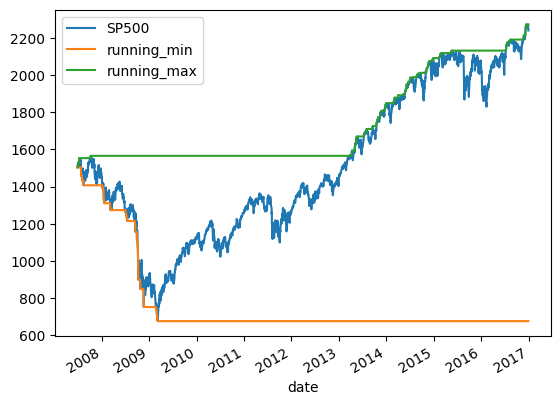

In [ ]:
data.plot();plt.show()

In [ ]:
def multi_period_return(period_returns):
  return np.prod(period_returns + 1) - 1

In [ ]:
pr = data.SP500.pct_change()# period return

In [ ]:
#ROLLING ANNUAL RATE OF RETURN
r = pr.rolling('360D').apply(multi_period_return)

In [ ]:
data['Rolling 1yr Return'] = r.mul(100)

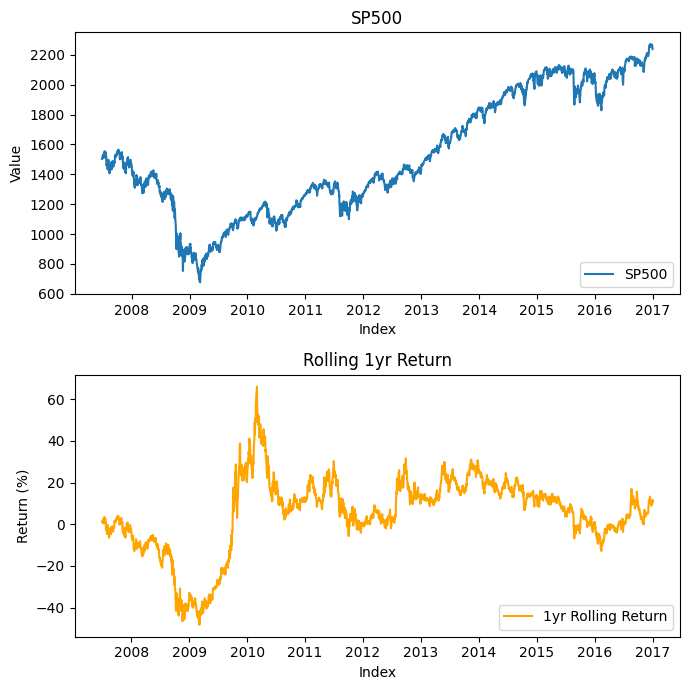

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,7))

# Plot 'SP500' in the first subplot
axes[0].plot(data['SP500'], label='SP500')
axes[0].legend(loc='lower right')
axes[0].set_title('SP500')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

# Plot 'Rolling 1yr Return' in the second subplot
axes[1].plot(data['Rolling 1yr Return'], color='orange', label='1yr Rolling Return')
axes[1].legend(loc='lower right')
axes[1].set_title('Rolling 1yr Return')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Return (%)')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

Rolling Annual Return: For each day in your dataset, this metric tells you what the return would have been if you had invested exactly one year before that day and held the investment until that day.

If you're looking at data from 2010 to 2020, for each day in 2015, the "Rolling 1yr Return" will tell you the return you would have gotten if you had invested 360 days earlier

## Experience 7

In [ ]:
data = pd.read_csv('apple_google.csv', parse_dates=['Date'], index_col='Date')
data.head(2)

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


In [ ]:
investment = 8800

In [ ]:
returns = data.pct_change()

In [ ]:
returns_plus_one = returns.add(1)

In [ ]:
#Using .sub(1) it would have made y axis to start from zero
cumulative_return = returns_plus_one.cumprod()

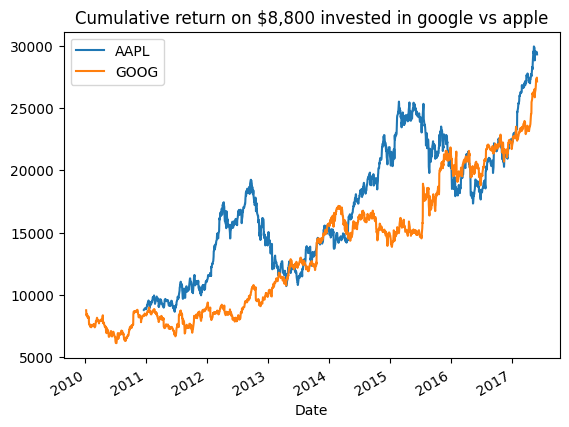

In [ ]:
#It starts from the initial investment amount
cumulative_return.mul(investment).plot(title='Cumulative return on $8,800 invested in google vs apple');plt.show()

Comparing how much $8,800 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.

## Experience 9

In [ ]:
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date').dropna()

In [ ]:
from numpy.random import normal, seed
from scipy.stats import norm
seed(42)

In [ ]:
random_returns = normal(loc=0, scale=0.01, size=1000)

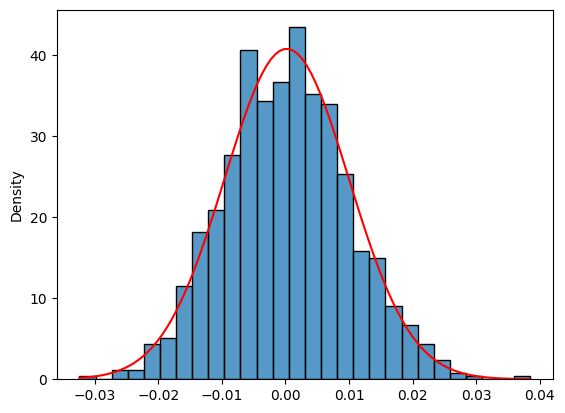

In [ ]:
# Create the histogram using histplot
sns.histplot(random_returns, kde=False, stat='density')

# Optionally, you can add a fitted normal distribution line
sns.lineplot(x=np.linspace(min(random_returns), max(random_returns), 100),
             y=norm.pdf(np.linspace(min(random_returns), max(random_returns), 100),
                        np.mean(random_returns), np.std(random_returns)),
             color='red')

# Show the plot
plt.show()

Creating a random price path

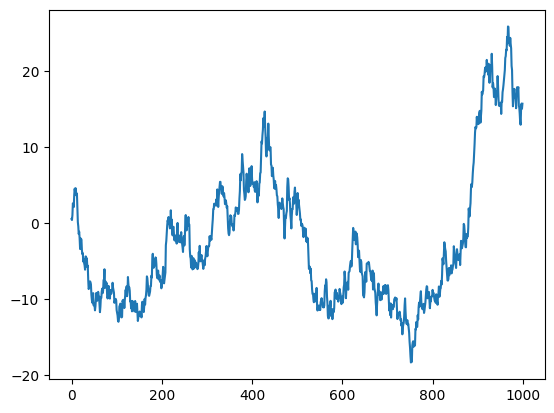

In [ ]:
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot();plt.show()

Using a random expanding walk with SP500

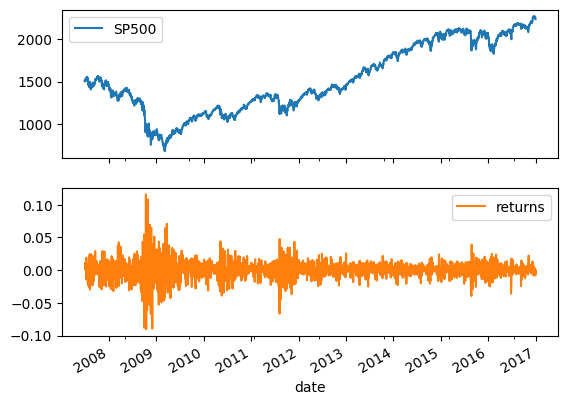

In [ ]:
data['returns'] = data.SP500.pct_change()
data.plot(subplots=True);plt.show()

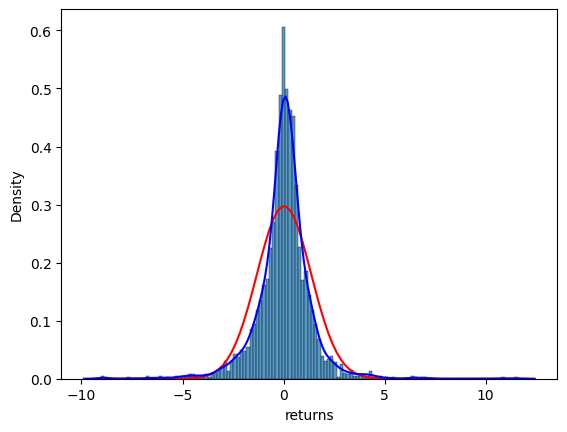

In [ ]:
# Create the histogram using histplot
sns.histplot(data.returns.dropna().mul(100), kde=False, stat='density')

# Optionally, you can add a fitted normal distribution line
sns.lineplot(x=np.linspace(min(data.returns.dropna().mul(100)), max(data.returns.dropna().mul(100)), 100),
             y=norm.pdf(np.linspace(min(data.returns.dropna().mul(100)), max(data.returns.dropna().mul(100)), 100),
                        np.mean(data.returns.dropna().mul(100)), np.std(data.returns.dropna().mul(100))),
             color='red')

# Add the KDE line for the distribution of data.returns.dropna().mul(100)
sns.kdeplot(data.returns.dropna().mul(100), color='blue')

# Show the plot
plt.show()

**Selecting Randomly from the SP500**

**RANDOM WALK**


A random walk is a process where the next step is determined by a random chance event. In financial terms, it refers to the theory that stock price movements are unpredictable and essentially random in the short term. There's no inherent trend or direction, and future prices are independent of past movements.

Random walk does not incorporate any predictive models or factors. It's more of a tool to:

Understand random walk theory: It demonstrates how a stock price might move randomly over time without any specific trend or pattern.

Generate hypothetical scenarios: It can be used to create potential price paths for stress testing or risk analysis purposes.

Compare actual price movements with random behavior: It allows you to visualize how the actual stock price deviates from a purely random walk.

In [ ]:
from numpy.random import choice
sample = data.returns.dropna()
n_obs = data.returns.count()
random_walk = choice(sample, size=n_obs)
random_walk = pd.Series(random_walk, index=sample.index)
random_walk.head()

,0
date,
2007-07-02,0.014605
2007-07-03,-0.000143
2007-07-05,-0.006321
2007-07-06,0.005052
2007-07-09,-0.008121


In [ ]:
start = data.SP500.first('D')

<ipython-input-50-731af9303a04>:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  start = data.SP500.first('D')


In [ ]:
sp500_random = pd.concat([start, random_walk.add(1)])
sp500_random.head()

,0
date,
2007-06-29,1503.350000
2007-07-02,1.014605
2007-07-03,0.999857
2007-07-05,0.993679
2007-07-06,1.005052


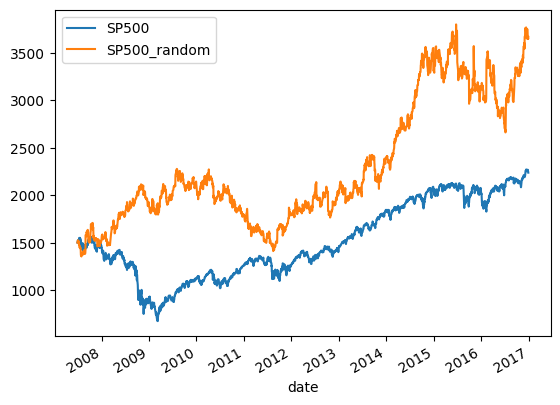

In [ ]:
data['SP500_random'] = sp500_random.cumprod()
data[['SP500', 'SP500_random']].plot();plt.show()

**OBSERVATION:**

In a proper random walk simulation, there should be no such boundary or barrier preventing the random walk from crossing the actual price line. The random walk should have the freedom to deviate above or below the real price at any point, with the potential for the gap between the two lines to grow quite large over time.

The fact that the orange line never crosses the blue line suggests the randomness is constrained in some way to keep it tracking the actual price, rather than representing a true unbiased random walk. So while the chart captures some of the random fluctuations, it lacks a key property of full independence from the starting point that a genuine random walk process should exhibit.

## Experience 12

<ipython-input-147-6e86fbea14d6>:18: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  start = fb.price.first('D')


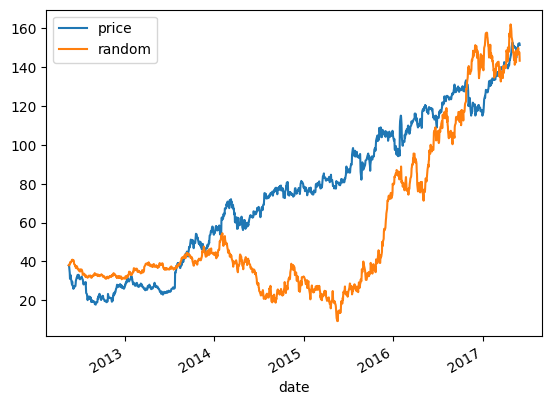

In [ ]:
seed(42)

fb = pd.read_csv('fb.csv', names=['date', 'price'], parse_dates=['date'], index_col='date').dropna()
fb.head(2)

daily_returns = fb.price.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Generate Random Walk Components (Improved)
def generate_random_walk_component(std_dev=0.02):  # Adjust std_dev for volatility
    daily_changes = norm.rvs(loc=0, scale=std_dev, size=n_obs)  # Normal distribution example
    return pd.Series(daily_changes, index=daily_returns.index)

random_walk_component = generate_random_walk_component()

start = fb.price.first('D')

# Ensure unique index before concatenation
random_walk_component = random_walk_component[~random_walk_component.index.duplicated(keep='first')]

random_price = pd.concat([start, random_walk_component.mul(fb['price'].shift(1))])  # Apply to shifted price
random_price = random_price.cumsum()  # Cumulative sum for realistic price progression

# Handle potential duplicate indices after cumsum
random_price = random_price[~random_price.index.duplicated(keep='first')]

fb['random'] = random_price
fb[['price', 'random']].plot()
plt.show()

**OBSERVATION:**

The acceptability of this random walk model depends on the specific application and the level of accuracy required.

there are certain applications where a random walk model might be expected to mimic the price to a certain degree, albeit not perfectly.

Examples: Option Pricing, Risk Management, Algorithmic Trading.

**Hypothesis Testing:**

In some cases, a random walk model might be used as a null hypothesis to test whether the price movements of an asset exhibit any predictable patterns. If the actual price movements deviate significantly from the random walk, it might suggest the presence of some underlying trend or pattern.

## Experience 13

RELATIONSHIPS BETWEEN TIME SERIES: CORRELATION

In [ ]:
data = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date').dropna()
data.head(2)

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.0,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.3,56.90,28.53,58.28


In [ ]:
data.asfreq('D')

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,117.26,148.36,771.40,14.00,78.23,241.56,128.94,104.80,33.49,38.35,9.13,116.13
2016-12-28,116.76,147.67,772.13,13.89,77.22,240.65,127.93,103.68,33.05,38.87,9.03,115.20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
dtypes: float64(12)
memory usage: 243.4 KB


In [ ]:
annual_prices = data.resample('A').last()

**data.resample('A')** splits the data into annual periods based on the datetime index. Each period will contain all the data points within that year.


**.last()**  selects the last data point within each annual period.
Example:
2020    -0.123
2021     0.456
2022     0.789


In [ ]:
annual_returns = annual_prices.pct_change()

Calculating the percentage change for each element with respect to the previous element in the annual_prices

In [ ]:
correlations = annual_returns.corr()

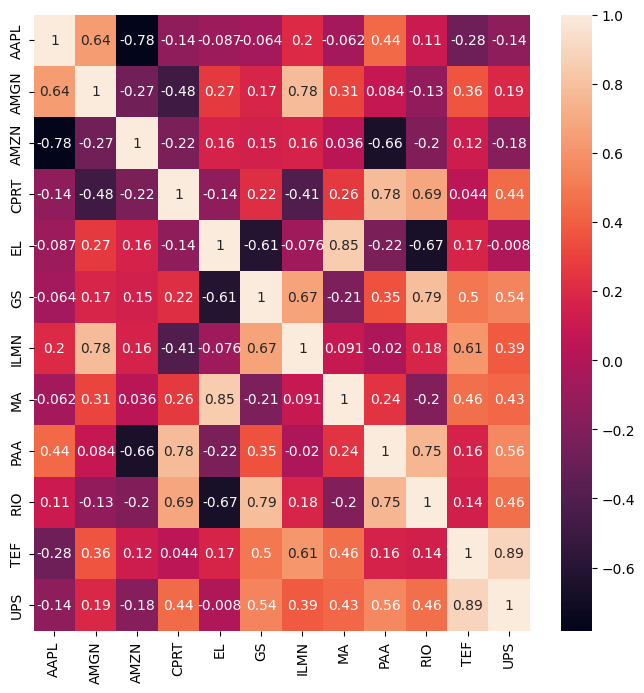

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlations, annot=True, ax=ax)
plt.show()

**OBSERVATION:**

This plot is very useful in finance, statistics, or any field where understanding the relationship between different variables or assets is crucial. It helps in identifying:

**Diversification:** Assets with low or negative correlations might be good for diversification in a portfolio.

**Redundancy:** High positive correlations between assets might indicate redundancy in a dataset or portfolio.